<h1>Task 3 Explortory Data Anlysis

<h2> SuperStore DataSet

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # to Fix eny system problem
import warnings # to ignore any system warning 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns 
from sklearn import datasets
from sklearn.cluster import KMeans 
%matplotlib inline

In [3]:
#import and read the data and show first 5 rows

df = pd.read_csv(r"D:\Sparks_Foundation\Task_3\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Cheking The Data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

<h2> Now, everything is clean and clear.

In [6]:
#Cheking The Missing Values / outlier's
df.shape

(9994, 13)

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<h2> These are the few observations that can be drawn from the fact that this function only displays continuous variables.

<h3> 1- No Missing Values .

<h3> 2-within "Sales" and "Profit." Because the difference between the maximum value and 75% is so great, there are likely outliers in the dataset.

In [8]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


<h2> We can draw the following conclusions about categorical variables:

<h3> 1- We will only look at 4 different types of shipping modes.

<h3> 2- There are three segments in this dataset.

In [9]:
# Analysing segment of people buying from the superstore
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Segment'].value_counts()/len(df['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

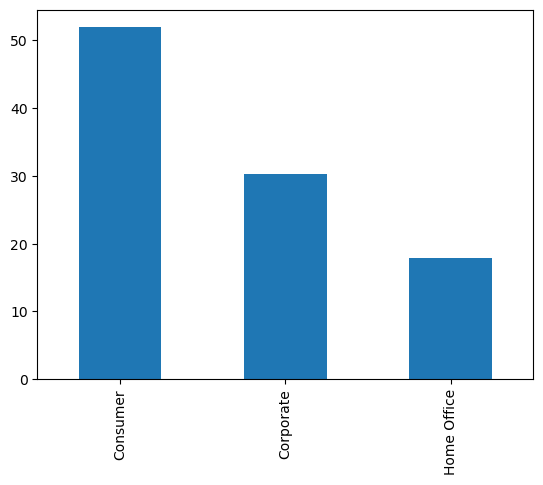

In [11]:
s=(df['Segment'].value_counts()/len(df['Segment'])*100).plot(kind='bar')

<h1> From the graph, the following conclusions can be drawn:

<h2> Of all humans, 50% are consumers.

<h2> 20 to 30 percent of the population is corporate and home office.

In [12]:
#Analysing The Ship mode for the supmart
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [13]:
M=(df['Ship Mode'].value_counts())/len(df['Ship Mode'])*100
M

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:>

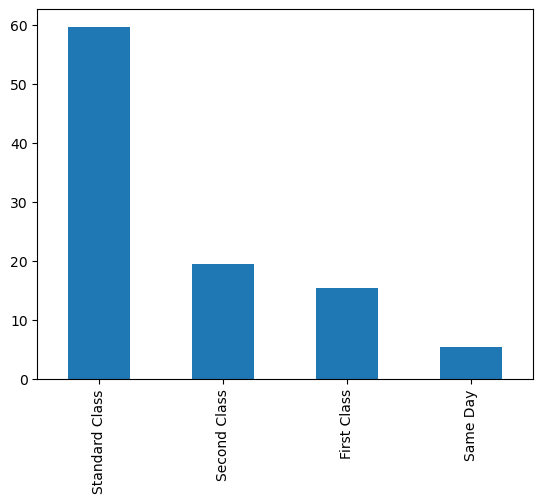

In [14]:
M.plot(kind='bar')

<h1> From the graph, the following conclusions may be drawn:

<h2> 1- The Deliviers are primarily from the standard-class 60%.

<h2> 2- A very small percentage of deliveries were made the same day.

<h2> 3- The first and second classes of deliveries consist of 10–20.

In [15]:
#Analysing Categories of items in the supermart.
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:>

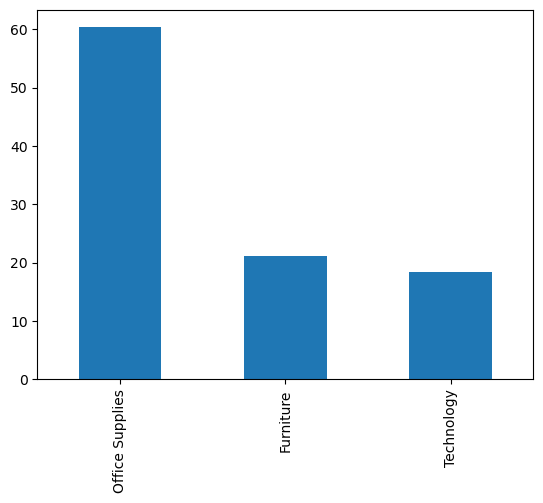

In [16]:
C=(df['Category'].value_counts())/len(df['Category'])*100
C.plot(kind='bar')

<h1>From the graph, the following conclusions may be drawn:

<h2>1- In the supermarket, Office Supplies make up the majority of the categories.

<h2>2- Furniture & Technology accounts for 20–25% of the total.

In [17]:
#Analysing "Sub-Category" of items in the supermart.
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:>

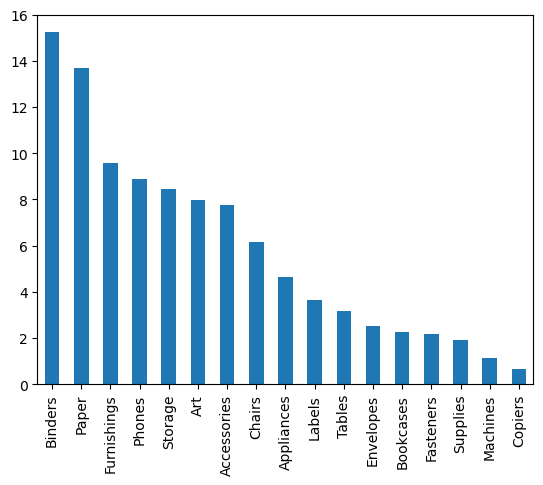

In [18]:
((df['Sub-Category'].value_counts())/len(df['Sub-Category'])*100).plot(kind='bar')

<h1>From the graph, the following conclusions may be drawn:

<h2>1- Office supplies make up 9–15% of the subcategories.

<h2>Furniture & Technology makes up two percent of the subcategory.

<h1> Bivariate Analysis

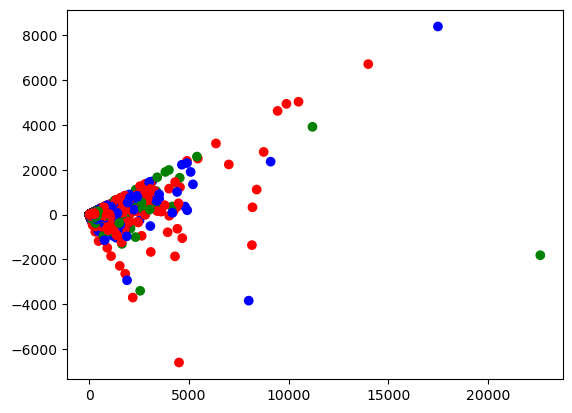

In [19]:
fig, ax = plt.subplots()
colors = {'Consumer':'red', 'Corporate':'blue', 'Home Office':'green'}
ax.scatter(df['Sales'], df['Profit'], c=df['Segment'].apply(lambda x: colors[x]))
plt.show()

<h2> From the above plot, we can say that there is more profit in consumer segment.

In [21]:
df.pivot_table(values='Sales', index='Segment', columns='Discount', aggfunc="median")

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [22]:
df.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc="median")

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


<h1>We can observe from the pivot table above.

<h2>1-The superstore will lose money if the discount is greater than 30%.

<h2>2-For products with discounts between 0 and 20%, the superstore's sales were average and, on top of that, it was profitable to some extent.

<h2> In the Pivot Table

<AxesSubplot:ylabel='Frequency'>

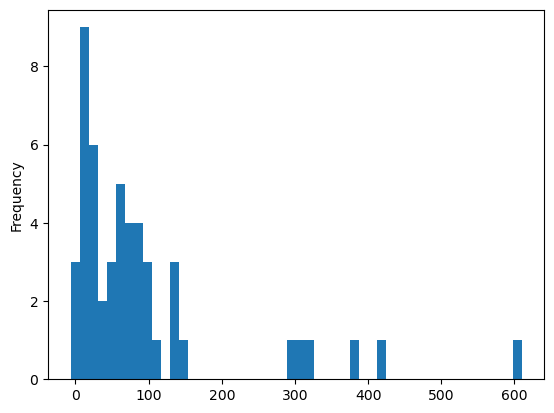

In [23]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.1)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

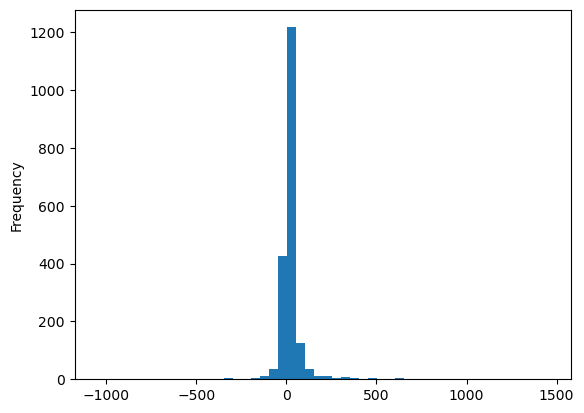

In [24]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

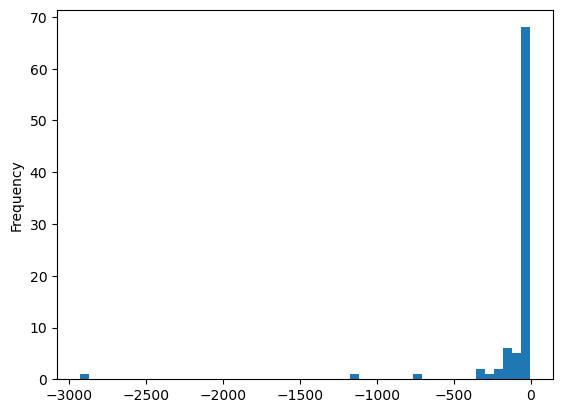

In [25]:
temp_df = df.loc[(df['Segment']=='Corporate')&(df['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

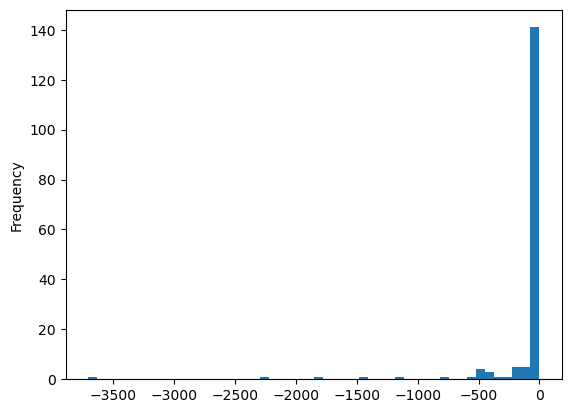

In [26]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

<h2> According to the graphs above, when a superstore offers a discount for any segment that is less than 40%, it will make money; however, if the discount is greater than 50%, as in the case of a discount of 80%, it will lose money.

<AxesSubplot:ylabel='Frequency'>

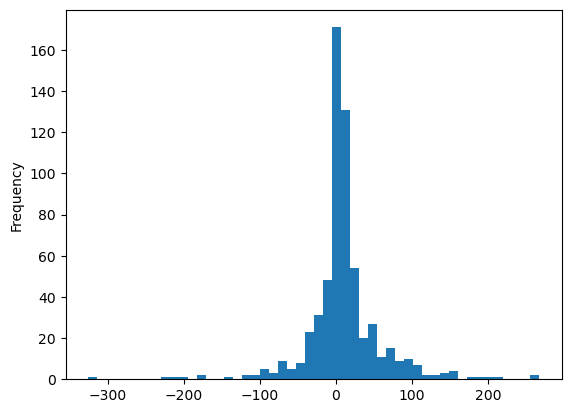

In [28]:
temp_df = df.loc[(df['Category']=='Furniture')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

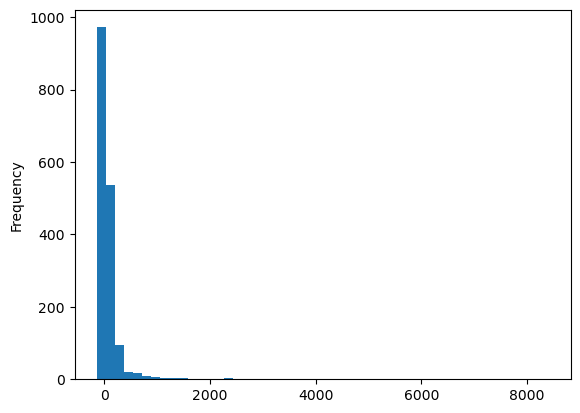

In [30]:
temp_df = df.loc[(df['Category']=='Technology')&(df['Discount']<=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

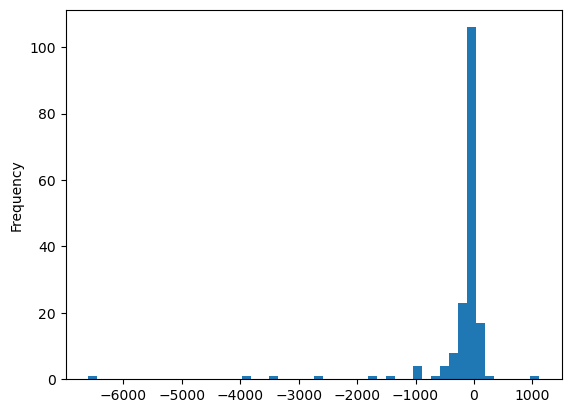

In [31]:
temp_df = df.loc[(df['Category']=='Technology')&(df['Discount']>=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

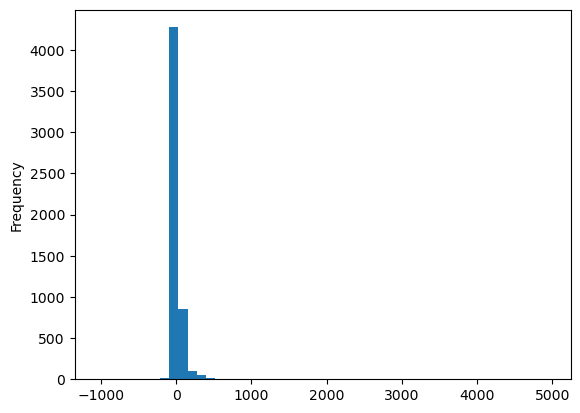

In [32]:
temp_df = df.loc[(df['Category']=='Office Supplies')&(df['Discount']<=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

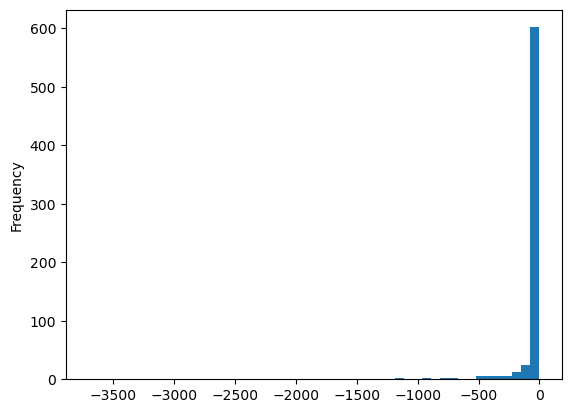

In [33]:
temp_df = df.loc[(df['Category']=='Office Supplies')&(df['Discount']>=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<h1>We may infer the following from the aforementioned graphs: Office supply, technology, and furniture:

<h2>technology, and furniture:
1. Sales were turning a profit when the discount on the products was greater than 30%.

<h2>2. Supstore suffers a severe loss when the discount is greater than 30% on the products.

<AxesSubplot:xlabel='Segment,Discount'>

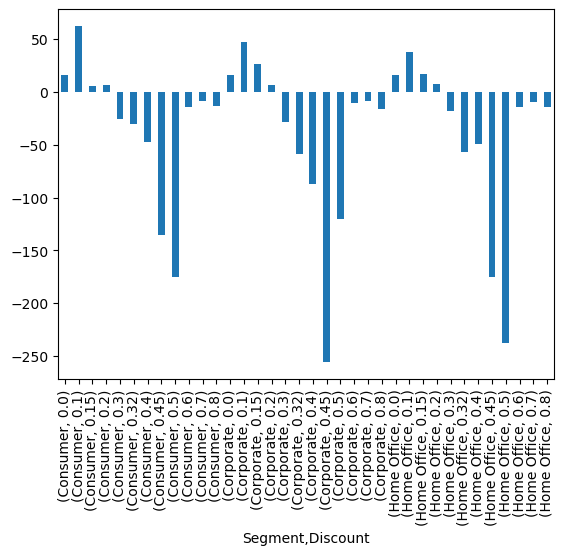

In [34]:
temp = df.groupby(['Segment', 'Discount']).Profit.median()
temp.plot(kind = 'bar', stacked = True)

<h1> This illustrates precisely what happened to all of the segments' profits when the superstore offered the following discount.

<h1> And that graph wasn't so great, but it did explain things!